In [ ]:
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
S = np.load('G:\DATA\MESO\TX29/2018_10_05\suite2p\combined/spks.npy')
iscell = np.load('G:\DATA\MESO\TX29/2018_10_05/suite2p\combined/iscell.npy')
S = S[iscell[:,0].astype(bool),:]

In [10]:
S -= np.mean(S, axis=1)[:, np.newaxis]

In [11]:
# rastermap algorithm
import sys
sys.path.insert(0, 'D:/Github/rastermap/rastermap/')
from mapping import map
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from scipy.sparse.linalg import eigsh
from scipy.stats import zscore
import numpy as np
import time

# run rastermap 
# (will take ~ 30s for 6000 neurons x 20000 timepts on a laptop)
# these are the default options, you can change them and input them to the function
ops = {'nclust': 30, # number of clusters
       'iPC': np.arange(0,200).astype(np.int32), # number of PCs to use for mapping algorithm
       'upsamp': 100, # upsampling factor for embedding position
       'sigUp': 1, # standard deviation for kriging upsampling
       'equal': False, # whether or not clusters should be of equal size (recommended False!)       
       'dims': 1,
       }
# user options

nmin = min([S.shape[0],S.shape[1]])
nmin = np.minimum(nmin-1, ops['iPC'].max())
sv,u = eigsh(S @ S.T, k=nmin)
sv = sv**0.5
v = S.T @ u

isort2,iclust2 = map(S.T,ops,v,sv)
Sm = gaussian_filter1d(S,3,axis=1)
isort1,iclust1 = map(Sm,ops,u,sv)

9402294000000.0
19532006000000.0
20219945000000.0
20664380000000.0
20989623000000.0
21224762000000.0
21394810000000.0
21510767000000.0
21609692000000.0
21705870000000.0
21812189000000.0
21926198000000.0
22052086000000.0
22189303000000.0
22337383000000.0
22498777000000.0
22660235000000.0
22826348000000.0
22996236000000.0
23158124000000.0
23316589000000.0
23473986000000.0
23632418000000.0
23791204000000.0
23952978000000.0
24112504000000.0
24269988000000.0
24427568000000.0
24588728000000.0
24746687000000.0
24902298000000.0
25057015000000.0
25211250000000.0
25360419000000.0
25510067000000.0
25657360000000.0
25801169000000.0
25946659000000.0
26092150000000.0
26238719000000.0
26385215000000.0
26532605000000.0
26682409000000.0
26834991000000.0
26997785000000.0
27171809000000.0
27337170000000.0
27494174000000.0
27652134000000.0
27813835000000.0
27841951000000.0
27855230000000.0
27863682000000.0
27868497000000.0
27874384000000.0
27877207000000.0
27879082000000.0
27877260000000.0
27876430000000.

In [14]:
# sort neurons and smooth across neurons and zscore in time
Sm = gaussian_filter1d(S[isort1,:].T, np.minimum(10,int(S.shape[0]*0.005)), axis=1)
Sm = Sm.T
Sm = zscore(Sm, axis=1)

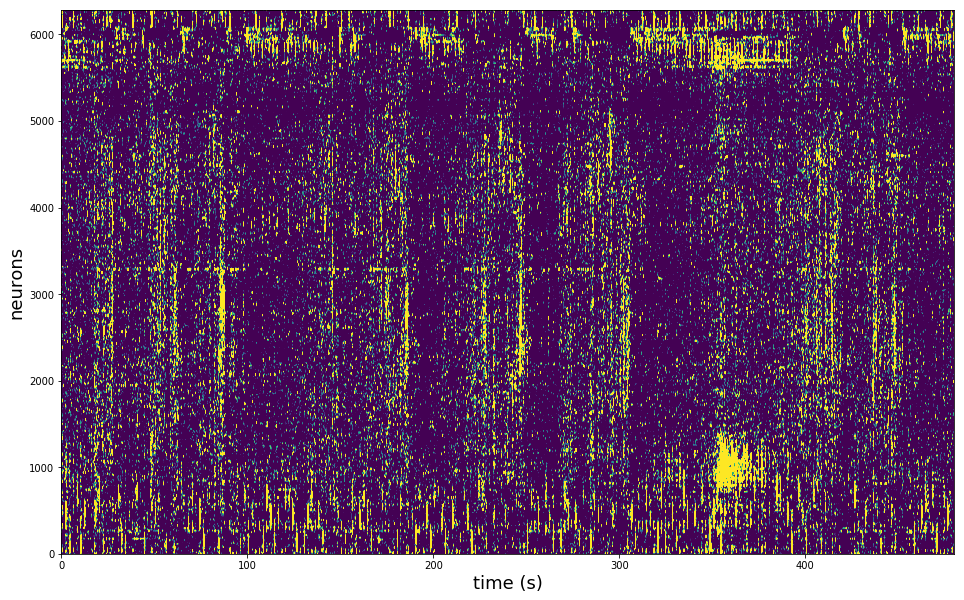

In [19]:
# view neuron sorting
fs = 2.5 # sampling rate of data in Hz
sp = Sm[:,1100:2300]
plt.figure(figsize=(16,10))
ax=plt.imshow(sp,vmin=0,vmax=1,aspect='auto',extent=[0,sp.shape[1]/fs, 0,sp.shape[0]])
plt.xlabel('time (s)', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()
